# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "/Users/erikfraas/Rutgers/Rutgers Homework/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/erikfraas/Rutgers/Rutgers Homework/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")


# Display the data table for preview
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [73]:
# Checking the number of mice.
mouse_count = study_data['Mouse ID'].nunique()
mouse_count

249

In [74]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = study_data[study_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]


In [75]:
# Optional: Get all the data for the duplicate mouse ID.
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_cleaned = study_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])
study_data_cleaned.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [77]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = study_data_cleaned['Mouse ID'].nunique()
cleaned_mouse_count

249

## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_summary = study_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    [ "mean", "median", "var", "std", "sem"])

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
regimen_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [79]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
regimen_summary_agg = study_data_cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    {"mean", "median", "var", "std", "sem"})

# Using the aggregation method, produce the same summary statistics in a single line
regimen_summary_agg

,var,std,median,mean,sem
Drug Regimen,,,,,
Capomulin,24.947764,4.994774,41.557809,40.675741,0.329346
Ceftamin,39.290177,6.268188,51.776157,52.591172,0.469821
Infubinol,43.128684,6.567243,51.820584,52.884795,0.492236
Ketapril,68.553577,8.279709,53.698743,55.235638,0.603860
Naftisol,66.173479,8.134708,52.509285,54.331565,0.596466
Placebo,61.168083,7.821003,52.288934,54.033581,0.581331
Propriva,43.138803,6.568014,50.909965,52.393463,0.525862
Ramicane,23.486704,4.846308,40.673236,40.216745,0.320955
Stelasyn,59.450562,7.710419,52.431737,54.233149,0.573111


## Bar and Pie Charts

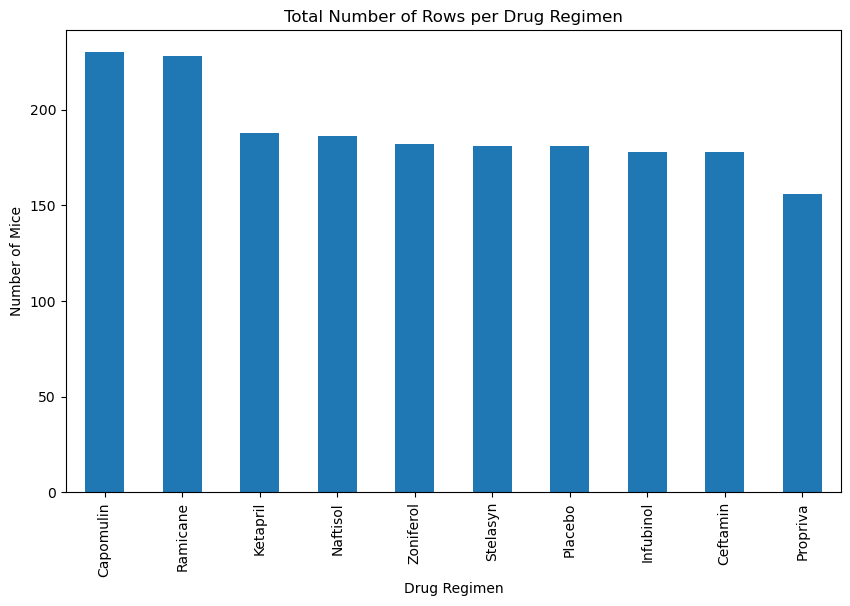

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = study_data_cleaned['Drug Regimen'].value_counts()
regimen_counts.plot(kind="bar", title="Total Number of Rows per Drug Regimen", figsize=(10,6))
plt.ylabel('Number of Mice')
plt.show()

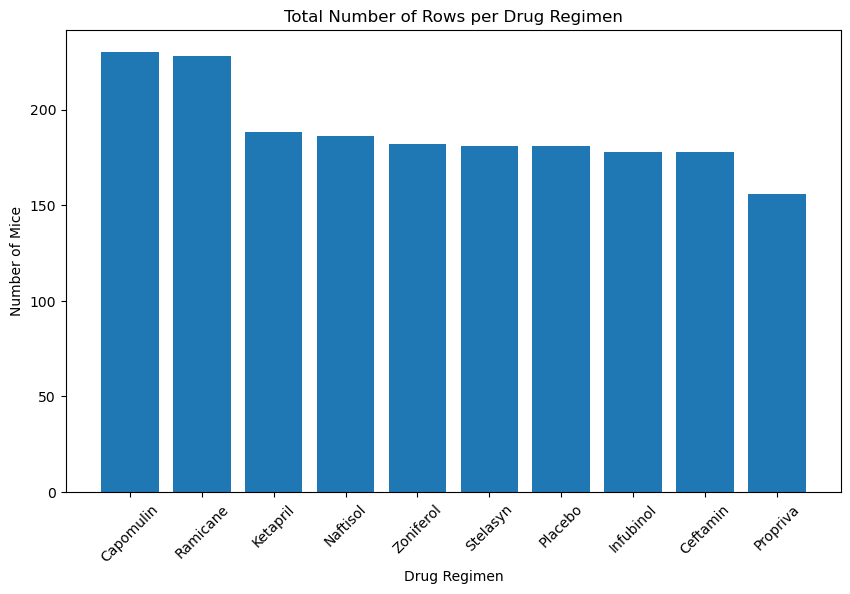

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10,6))
plt.bar(regimen_counts.index, regimen_counts.values)
plt.title("Total Number of Rows per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation=45)
plt.show()

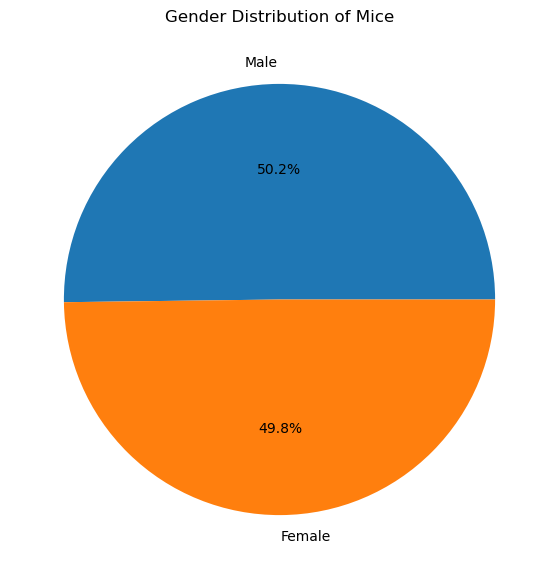

In [82]:
# Get the unique mice with their gender
gender_counts = study_data_cleaned.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts.plot(kind="pie", autopct='%1.1f%%', figsize=(7,7), title="Gender Distribution of Mice", legend=False)
plt.ylabel('')
plt.show()

# Make the pie chart



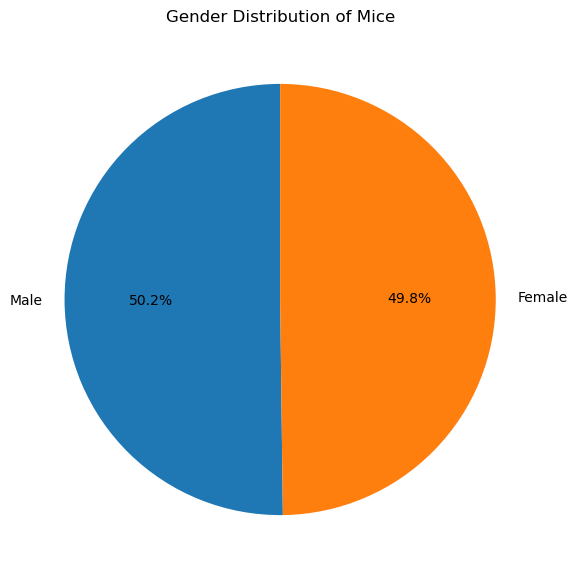

In [83]:
# Get the unique mice with their gender
gender_counts = study_data_cleaned.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()


# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.figure(figsize=(7,7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution of Mice")
plt.show()


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [84]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = study_data_cleaned.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volume = pd.merge(last_timepoint, study_data_cleaned, on=["Mouse ID", "Timepoint"])

# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
last_tumor_volume = last_tumor_volume[last_tumor_volume["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = study_data_cleaned.groupby("Mouse ID")["Timepoint"].max()


last_tumor_volume.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25


In [85]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.
iqr_data = last_tumor_volume.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
iqr_data["IQR"] = iqr_data["75%"] - iqr_data["25%"]
iqr_data["Lower Bound"] = iqr_data["25%"] - (1.5 * iqr_data["IQR"])
iqr_data["Upper Bound"] = iqr_data["75%"] + (1.5 * iqr_data["IQR"])

<Figure size 1000x600 with 0 Axes>

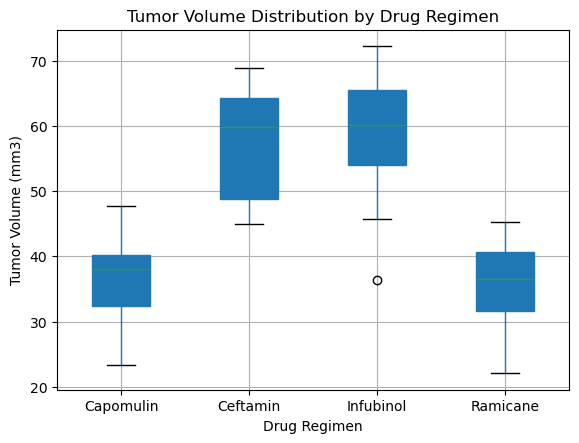

In [86]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
last_tumor_volume.boxplot(by="Drug Regimen", column="Tumor Volume (mm3)", patch_artist=True)
plt.title('Tumor Volume Distribution by Drug Regimen')
plt.suptitle('')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

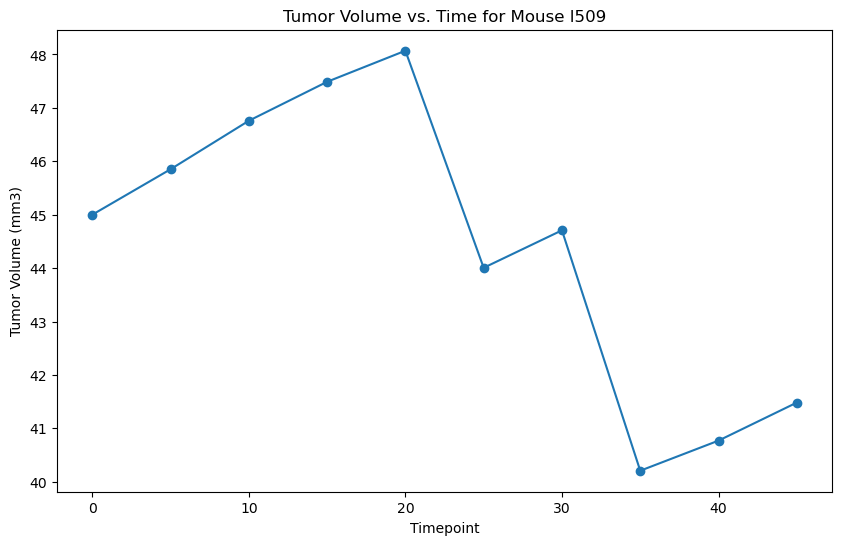

In [87]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = study_data_cleaned[study_data_cleaned["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin_data[capomulin_data["Mouse ID"] == "l509"]
plt.figure(figsize=(10,6))
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"], marker='o')
plt.title('Tumor Volume vs. Time for Mouse l509')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

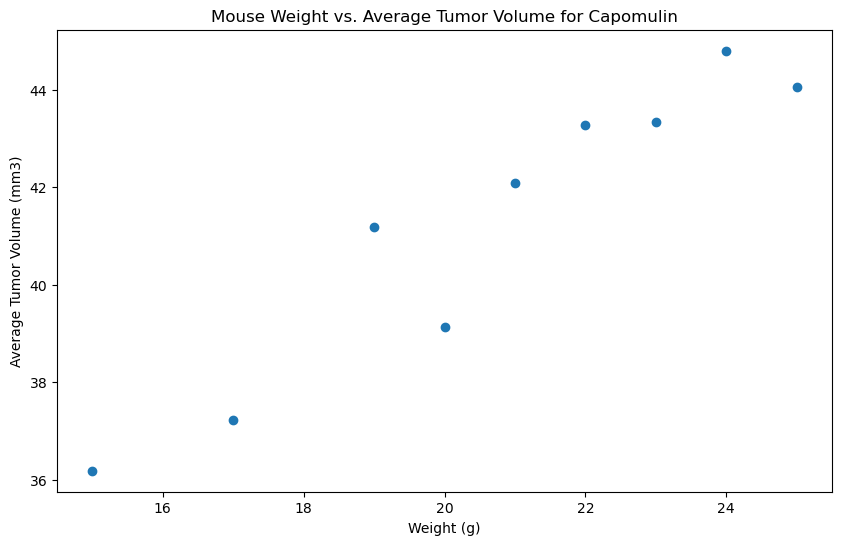

In [88]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg = capomulin_data.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
plt.figure(figsize=(10,6))
plt.scatter(capomulin_avg.index, capomulin_avg.values)
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

Pearson Correlation Coefficient: 0.9505243961855266


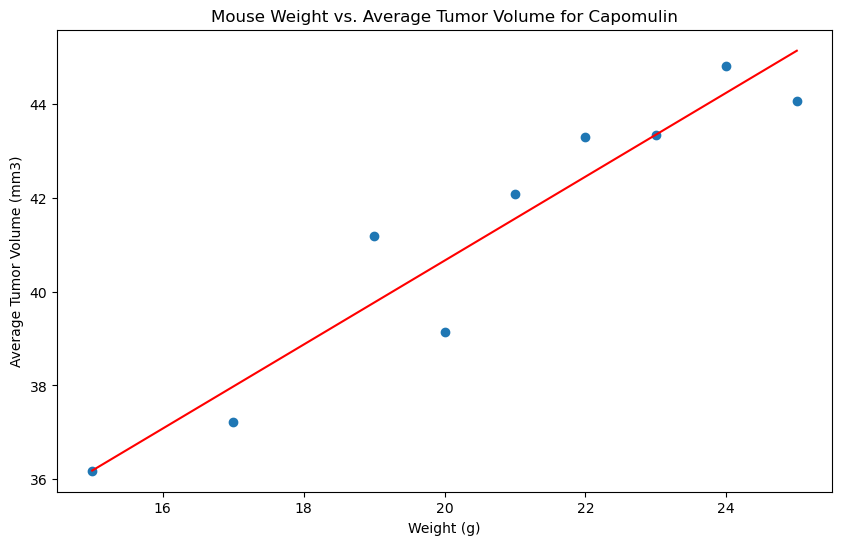

In [89]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg.index, capomulin_avg.values)[0]
print(f"Pearson Correlation Coefficient: {correlation}")
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_avg.index, capomulin_avg.values)
plt.figure(figsize=(10,6))
plt.scatter(capomulin_avg.index, capomulin_avg.values)
plt.plot(capomulin_avg.index, slope * capomulin_avg.index + intercept, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

Pearson Correlation Coefficient: 0.9505243961855266


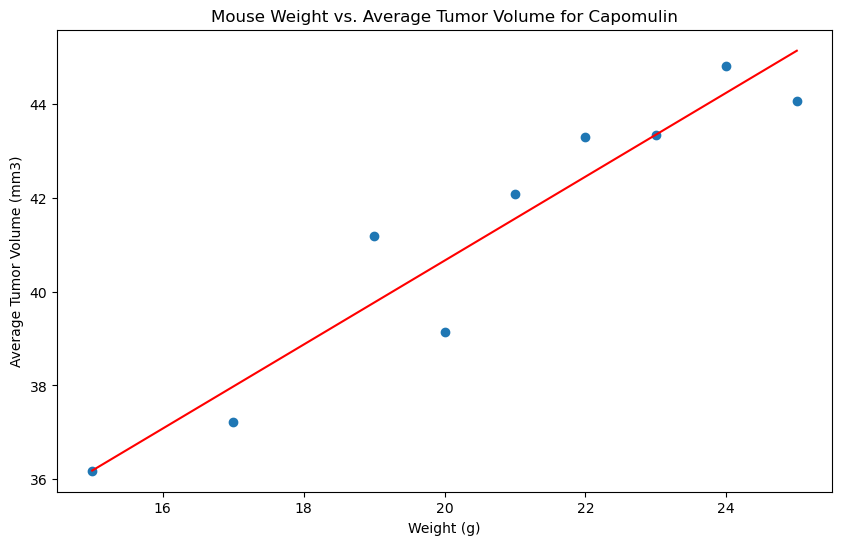

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_avg.index, capomulin_avg.values)[0]
print(f"Pearson Correlation Coefficient: {correlation}")
slope, intercept, r_value, p_value, std_err = st.linregress(capomulin_avg.index, capomulin_avg.values)
plt.figure(figsize=(10,6))
plt.scatter(capomulin_avg.index, capomulin_avg.values)
plt.plot(capomulin_avg.index, slope * capomulin_avg.index + intercept, color='red')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()